In [2]:
import gzip
import json
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plac
from IPython.display import clear_output
import random
from statsmodels.distributions.empirical_distribution import ECDF
from scipy import stats as ss
import os
from google.colab import drive
drive.mount('/gdrive', force_remount=True)
os.chdir('/gdrive/My Drive/IC_tales/code')
import disrupt as dr
import amutils as at

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /gdrive


<br><p>Carregando os dados</p><br>

In [0]:
dados = at.load_am_json_data()

In [0]:
G = at.build_graph(dados)

Atualizado


<br><p>Número de vértices e arestas de G:</p><br>

In [0]:
print("Vértices: ",G.number_of_nodes(),"\nArestas: ",G.number_of_edges())

Vértices:  32568 
Arestas:  119961


In [5]:
#G_table = dr.compute_disruption(G)
#G_table.to_csv(r'C:\Users\Tales Panoutsos\Documents\GitHub\IC\data\G_table.csv')
G_table = pd.read_csv('../data/G_table_allmusic_disruption.csv')
G_table = pd.DataFrame(data = G_table)
G_table = G_table.rename(columns = {'Unnamed: 0':''})
G_table.index = G_table['']
G_table = G_table.drop(columns = '')
G_table.head()

,ni_E,ni_D,ni,nj_E,nj_D,nj,nk_E,nk_D,nk,disruption,in,out,ci
,,,,,,,,,,,,,
mn0000112057,4.0,0.0,4.0,2.0,0.0,2.0,1109.0,62.0,1171.0,0.001699,6.0,12.0,0.3447
mn0000489999,26.0,1.0,27.0,14.0,0.0,14.0,1410.0,138.0,1548.0,0.008181,41.0,9.0,0.0476
mn0000485191,40.0,0.0,40.0,17.0,0.0,17.0,1535.0,80.0,1615.0,0.013756,57.0,9.0,0.0034
mn0000062583,1.0,0.0,1.0,5.0,0.0,5.0,2226.0,206.0,2432.0,-0.001641,6.0,16.0,0.2058
mn0000251361,8.0,0.0,8.0,6.0,0.0,6.0,939.0,308.0,1247.0,0.001586,14.0,10.0,0.3635


In [0]:
G_table = G_table.dropna().copy()

In [0]:
ci_g = dr.get_confidence_disruption(G_table)

In [0]:
G_table['ci'] = 1-ci_g
G_table.head()

,ni_E,ni_D,ni,nj_E,nj_D,nj,nk_E,nk_D,nk,disruption,in,out,ci
,,,,,,,,,,,,,
mn0000112057,4.0,0.0,4.0,2.0,0.0,2.0,1109.0,62.0,1171.0,0.001699,6.0,12.0,0.3408
mn0000489999,26.0,1.0,27.0,14.0,0.0,14.0,1410.0,138.0,1548.0,0.008181,41.0,9.0,0.0425
mn0000485191,40.0,0.0,40.0,17.0,0.0,17.0,1535.0,80.0,1615.0,0.013756,57.0,9.0,0.0044
mn0000062583,1.0,0.0,1.0,5.0,0.0,5.0,2226.0,206.0,2432.0,-0.001641,6.0,16.0,0.2132
mn0000251361,8.0,0.0,8.0,6.0,0.0,6.0,939.0,308.0,1247.0,0.001586,14.0,10.0,0.3728


<br><h2>Correlação com Betweenness Centrality</h2>
<p>Ao calcularmos a disruptividade do grafo inteiro esparamos os Ns entre nodes do mesmo gênero e nodes de gêneros diferentes.</p>

In [0]:
#bet_cen = nx.betweenness_centrality(G)

In [6]:
#bet_cen_df = pd.DataFrame(bet_cen.values(), index = bet_cen.keys(), columns = ['bet_cen'])
#bet_cen_df.to_csv(r'C:\Users\Tales Panoutsos\Documents\GitHub\IC\data\betweenness_centrality.csv')
bet_cen_df = pd.read_csv('../data/betweenness_centrality.csv')
bet_cen_df = bet_cen_df.rename(columns = {'Unnamed: 0': ' '})
bet_cen_df.index = bet_cen_df[' ']
bet_cen_df = bet_cen_df.drop(columns = ' ')
bet_cen_df.head()

,bet_cen
,
mn0002902860,0.000000
mn0002188917,0.000000
mn0002196868,0.000000
mn0000134046,0.000000
mn0000175553,0.001415


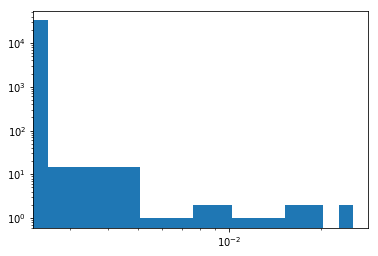

In [0]:
plt.hist(np.array(list(bet_cen_df['bet_cen'])))
plt.xscale(value = 'log')
plt.yscale(value = 'log')
plt.show()

SpearmanrResult(correlation=0.03381203746792957, pvalue=0.320850385783414)


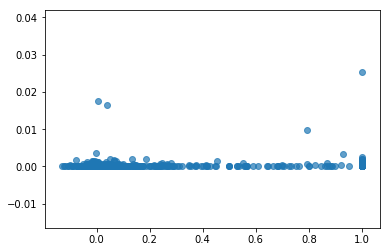

In [0]:
bet_cen_df_able = bet_cen_df.loc[list(set(bet_cen_df.index.intersection(set(G_table[G_table['ci']<0.05].index))))]
plt.scatter(G_table[G_table['ci']<0.05]['disruption'], bet_cen_df_able, alpha= 0.7)
print(ss.spearmanr(G_table[G_table['ci']<0.05]['disruption'], bet_cen_df_able ))
plt.show()

In [0]:
winner = bet_cen_df.sort_values(by = "bet_cen", ascending= False).index[0]
dados[winner]

{'name': 'Louis Armstrong',
 'decades': [1920, 1930, 1940, 1950, 1960, 1970],
 'birthdate': 'August 4, 1901',
 'birthdate.id': '1901-08-04',
 'birthplace': 'New Orleans, LA',
 'birthplace.id': 'new-orleans-la-mz0000003379',
 'deathdate': 'July 6, 1971',
 'deathdate.id': '1971-07-06',
 'deathplace': 'New York City, NY',
 'deathplace.id': 'new-york-city-ny-mz0000340765',
 'genres': {'jazz-ma0000002674': 'Jazz', 'vocal-ma0000011877': 'Vocal'},
 'styles': {'dixieland-ma0000002553': 'Dixieland',
  'early-jazz-ma0000002519': 'Early Jazz',
  'new-orleans-jazz-ma0000011830': 'New Orleans Jazz',
  'vocal-jazz-ma0000002948': 'Vocal Jazz',
  'swing-ma0000004423': 'Swing',
  'traditional-pop-ma0000002961': 'Traditional Pop',
  'jazz-instrument-ma0000002947': 'Jazz Instrument',
  'trumpet-jazz-ma0000002485': 'Trumpet Jazz'},
 'members': [],
 'releases': ['1947-??-??-New Orleans',
  '1950-??-??-Jazz Concert',
  '1950-??-??-New Orleans Days',
  '1950-??-??-New Orleans to New York',
  '1951-??-??-Satc